In [2]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
from clean_dataset import import_csv_data

In [3]:
file_path = 'data\immoweb-dataset.csv'
raw_df = import_csv_data(file_path)
raw_df


,Unnamed: 0,id,url,type,subtype,bedroomCount,bathroomCount,province,locality,postCode,...,hasOffice,toiletCount,hasSwimmingPool,hasFireplace,hasTerrace,terraceSurface,terraceOrientation,accessibleDisabledPeople,epcScore,price
0,0,20661494.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,...,NaN,1.0,NaN,NaN,True,7.0,NaN,NaN,C,399000.0
1,1,20647642.0,https://www.immoweb.be/en/classified/house/for...,HOUSE,HOUSE,4.0,2.0,Brussels,Etterbeek,1040,...,True,3.0,NaN,NaN,True,1.0,NaN,NaN,E,895000.0
2,2,20644816.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,...,NaN,1.0,NaN,NaN,True,2.0,NaN,NaN,F,465000.0
3,3,20659813.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,2.0,2.0,Brussels,Bruxelles,1040,...,NaN,2.0,NaN,NaN,True,3.0,NaN,NaN,B,590000.0
4,4,20633249.0,https://www.immoweb.be/en/classified/flat-stud...,APARTMENT,FLAT_STUDIO,1.0,1.0,Brussels,Etterbeek,1040,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,E,289000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80363,440319,20663057.0,https://www.immoweb.be/en/classified/villa/for...,HOUSE,VILLA,3.0,1.0,Antwerp,Willebroek,2830,...,NaN,3.0,True,NaN,True,NaN,NaN,NaN,B,849000.0
80364,440364,20664347.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,3.0,1.0,Brussels,Jette,1090,...,NaN,1.0,NaN,NaN,True,10.0,NaN,NaN,D,279000.0
80365,440966,20664354.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,3.0,1.0,Flemish Brabant,Grimbergen Strombeek-Bever,1853,...,NaN,1.0,NaN,NaN,True,9.0,NaN,NaN,B,299000.0
80366,442237,20664377.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,3.0,2.0,West Flanders,Westende,8434,...,NaN,2.0,NaN,NaN,True,NaN,NaN,NaN,A,325000.0


#### Duplicates

In [4]:
raw_df[raw_df.duplicated()]

,Unnamed: 0,id,url,type,subtype,bedroomCount,bathroomCount,province,locality,postCode,...,hasOffice,toiletCount,hasSwimmingPool,hasFireplace,hasTerrace,terraceSurface,terraceOrientation,accessibleDisabledPeople,epcScore,price


In [5]:
len(raw_df)

80368

In [6]:
raw_df.drop_duplicates(subset=['id'], inplace=True)

In [7]:
len(raw_df)

80367

### Analyzing raw dataframe

In [8]:
raw_df.head()

,Unnamed: 0,id,url,type,subtype,bedroomCount,bathroomCount,province,locality,postCode,...,hasOffice,toiletCount,hasSwimmingPool,hasFireplace,hasTerrace,terraceSurface,terraceOrientation,accessibleDisabledPeople,epcScore,price
0,0,20661494.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,...,NaN,1.0,NaN,NaN,True,7.0,NaN,NaN,C,399000.0
1,1,20647642.0,https://www.immoweb.be/en/classified/house/for...,HOUSE,HOUSE,4.0,2.0,Brussels,Etterbeek,1040,...,True,3.0,NaN,NaN,True,1.0,NaN,NaN,E,895000.0
2,2,20644816.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,...,NaN,1.0,NaN,NaN,True,2.0,NaN,NaN,F,465000.0
3,3,20659813.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,2.0,2.0,Brussels,Bruxelles,1040,...,NaN,2.0,NaN,NaN,True,3.0,NaN,NaN,B,590000.0
4,4,20633249.0,https://www.immoweb.be/en/classified/flat-stud...,APARTMENT,FLAT_STUDIO,1.0,1.0,Brussels,Etterbeek,1040,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,E,289000.0


In [9]:
how_many_na = raw_df.isna().sum()
how_many_na

Unnamed: 0                      0
id                              0
url                             0
type                            0
subtype                         0
bedroomCount                 6810
bathroomCount               13696
province                        0
locality                        0
postCode                        0
habitableSurface            12585
roomCount                   58420
monthlyCost                 80367
hasAttic                    67852
hasBasement                 51052
hasDressingRoom             77739
diningRoomSurface           73467
hasDiningRoom               66227
buildingCondition           22376
buildingConstructionYear    31262
facedeCount                 27129
floorCount                  42822
streetFacadeWidth           64858
hasLift                     61323
floodZoneType               35902
heatingType                 33214
hasHeatPump                 72895
hasPhotovoltaicPanels       72319
hasThermicPanels            77255
kitchenSurface

### Price cleaning

###### Dropping rows without a price

In [10]:
df_wo_null_price = raw_df[~raw_df['price'].isna()]
df_wo_null_price

,Unnamed: 0,id,url,type,subtype,bedroomCount,bathroomCount,province,locality,postCode,...,hasOffice,toiletCount,hasSwimmingPool,hasFireplace,hasTerrace,terraceSurface,terraceOrientation,accessibleDisabledPeople,epcScore,price
0,0,20661494.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,...,NaN,1.0,NaN,NaN,True,7.0,NaN,NaN,C,399000.0
1,1,20647642.0,https://www.immoweb.be/en/classified/house/for...,HOUSE,HOUSE,4.0,2.0,Brussels,Etterbeek,1040,...,True,3.0,NaN,NaN,True,1.0,NaN,NaN,E,895000.0
2,2,20644816.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,...,NaN,1.0,NaN,NaN,True,2.0,NaN,NaN,F,465000.0
3,3,20659813.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,2.0,2.0,Brussels,Bruxelles,1040,...,NaN,2.0,NaN,NaN,True,3.0,NaN,NaN,B,590000.0
4,4,20633249.0,https://www.immoweb.be/en/classified/flat-stud...,APARTMENT,FLAT_STUDIO,1.0,1.0,Brussels,Etterbeek,1040,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,E,289000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80362,380220,20379774.0,https://www.immoweb.be/en/classified/house/for...,HOUSE,HOUSE,4.0,2.0,East Flanders,Maldegem,9990,...,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,649000.0
80364,440364,20664347.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,3.0,1.0,Brussels,Jette,1090,...,NaN,1.0,NaN,NaN,True,10.0,NaN,NaN,D,279000.0
80365,440966,20664354.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,3.0,1.0,Flemish Brabant,Grimbergen Strombeek-Bever,1853,...,NaN,1.0,NaN,NaN,True,9.0,NaN,NaN,B,299000.0
80366,442237,20664377.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,3.0,2.0,West Flanders,Westende,8434,...,NaN,2.0,NaN,NaN,True,NaN,NaN,NaN,A,325000.0


###### Dropping rows with outlier price

In [18]:
df_wo_null_price= df_wo_null_price[(df_wo_null_price['price'] >= 50000) & (df_wo_null_price['price'] <= 5000000)]
len(df_wo_null_price)

76103

In [20]:
def identify_missing_cols(df, threshold):
    lenght_df = len(df)
    threshold_numbers = threshold * lenght_df
    missing_col ={}
    
    for column in df.columns:
        number_nan = df[column].isna().sum()
        if number_nan >= threshold_numbers:
            missing_col[column] = number_nan/lenght_df
        
    return missing_col

In [21]:
threshold =0.8

In [ ]:
cols_less_threshold = identify_missing_cols(df_wo_null_price, threshold)
print(f"Total number of attributes: {len(cols_less_threshold )}\n")

print("Printing columns with more 80% NaN values")
for k,v in cols_less_threshold.items():
      
    print(k,v)

Total number of attributes: 14

Printing columns with more 80% NaN values
hasAttic 0.8358146196601973
hasDressingRoom 0.9655466932972419
diningRoomSurface 0.909583065056568
hasDiningRoom 0.8149613024453701
hasHeatPump 0.9020012351681274
hasPhotovoltaicPanels 0.8943274246744544
hasThermicPanels 0.9591211910174369
gardenOrientation 0.9264943563328647
hasAirConditioning 0.9853225234222042
hasArmoredDoor 0.951723322339461
hasOffice 0.8643943077145447
hasSwimmingPool 0.9770048486919044
hasFireplace 0.9601198375885314
terraceOrientation 0.8525813699854145


##### Dropping the non-relevant and empty columns

In [17]:
df_wo_null_price.drop(columns= ['Unnamed: 0', 'accessibleDisabledPeople', 'monthlyCost', 'hasBalcony' ], inplace = True)
df_wo_null_price

C:\Users\herms\AppData\Local\Temp\ipykernel_31436\3566671919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wo_null_price.drop(columns= ['Unnamed: 0', 'accessibleDisabledPeople', 'monthlyCost', 'hasBalcony' ], inplace = True)


,id,url,type,subtype,bedroomCount,bathroomCount,province,locality,postCode,habitableSurface,...,hasVisiophone,hasOffice,toiletCount,hasSwimmingPool,hasFireplace,hasTerrace,terraceSurface,terraceOrientation,epcScore,price
0,20661494.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,100.0,...,True,NaN,1.0,NaN,NaN,True,7.0,NaN,C,399000.0
1,20647642.0,https://www.immoweb.be/en/classified/house/for...,HOUSE,HOUSE,4.0,2.0,Brussels,Etterbeek,1040,270.0,...,NaN,True,3.0,NaN,NaN,True,1.0,NaN,E,895000.0
2,20644816.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,87.0,...,NaN,NaN,1.0,NaN,NaN,True,2.0,NaN,F,465000.0
3,20659813.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,2.0,2.0,Brussels,Bruxelles,1040,104.0,...,True,NaN,2.0,NaN,NaN,True,3.0,NaN,B,590000.0
4,20633249.0,https://www.immoweb.be/en/classified/flat-stud...,APARTMENT,FLAT_STUDIO,1.0,1.0,Brussels,Etterbeek,1040,71.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,E,289000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80362,20379774.0,https://www.immoweb.be/en/classified/house/for...,HOUSE,HOUSE,4.0,2.0,East Flanders,Maldegem,9990,242.0,...,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,649000.0
80364,20664347.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,3.0,1.0,Brussels,Jette,1090,94.0,...,True,NaN,1.0,NaN,NaN,True,10.0,NaN,D,279000.0
80365,20664354.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,3.0,1.0,Flemish Brabant,Grimbergen Strombeek-Bever,1853,113.0,...,NaN,NaN,1.0,NaN,NaN,True,9.0,NaN,B,299000.0
80366,20664377.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,3.0,2.0,West Flanders,Westende,8434,111.0,...,NaN,NaN,2.0,NaN,NaN,True,NaN,NaN,A,325000.0


### Bool Columns

In [29]:
bool_columns = ['hasAttic',
'hasBasement', 
'hasDressingRoom',
'hasDiningRoom' ,
'hasLift',
'hasHeatPump',
'hasPhotovoltaicPanels',
'hasThermicPanels',
'hasGarden',
'hasAirConditioning',
'hasArmoredDoor',
'hasVisiophone',
'hasOffice',
'hasSwimmingPool',
'hasFireplace',
'hasLivingRoom']

In [30]:
len(bool_columns)

16

#### Imputting values for the bool columns

In [31]:
for column in bool_columns:
    df_wo_null_price[column].fillna(value = False, inplace=True)

C:\Users\herms\AppData\Local\Temp\ipykernel_31436\3929086686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wo_null_price[column].fillna(value = False, inplace=True)
C:\Users\herms\AppData\Local\Temp\ipykernel_31436\3929086686.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_wo_null_price[column].fillna(value = False, inplace=Tru

#### Analysis of bool columns

In [32]:
for bool_col in bool_columns:
    w_out_ = df_wo_null_price.groupby(bool_col)['price'].mean()
    print(w_out_)

hasAttic
False    437837.070321
True     421334.700680
Name: price, dtype: float64
hasBasement
False    427164.880296
True     447897.323035
Name: price, dtype: float64
hasDressingRoom
False    427530.999605
True     648021.385202
Name: price, dtype: float64
hasDiningRoom
False    423776.376663
True     485121.630237
Name: price, dtype: float64
hasLift
False    429053.511625
True     453399.540949
Name: price, dtype: float64
hasHeatPump
False    426329.082876
True     516111.230893
Name: price, dtype: float64
hasPhotovoltaicPanels
False    427461.335464
True     500008.890948
Name: price, dtype: float64
hasThermicPanels
False    430819.788771
True     536200.396014
Name: price, dtype: float64
hasGarden
False    423784.453715
True     478076.854528
Name: price, dtype: float64
hasAirConditioning
False    431754.805404
True     661550.238138
Name: price, dtype: float64
hasArmoredDoor
False    424826.518618
True     638202.922428
Name: price, dtype: float64
hasVisiophone
False    412851.03

##### Swimming Pool Analysis

In [33]:
print(df_wo_null_price.groupby('type')['hasSwimmingPool'].value_counts())

type       hasSwimmingPool
APARTMENT  False              30862
           True                 245
HOUSE      False              43491
           True                1505
Name: count, dtype: int64


In [34]:
w_out_pool = df_wo_null_price.groupby('hasSwimmingPool')['price'].mean()
print(w_out_pool)

hasSwimmingPool
False    4.193803e+05
True     1.104190e+06
Name: price, dtype: float64


<Axes: xlabel='hasSwimmingPool', ylabel='price'>

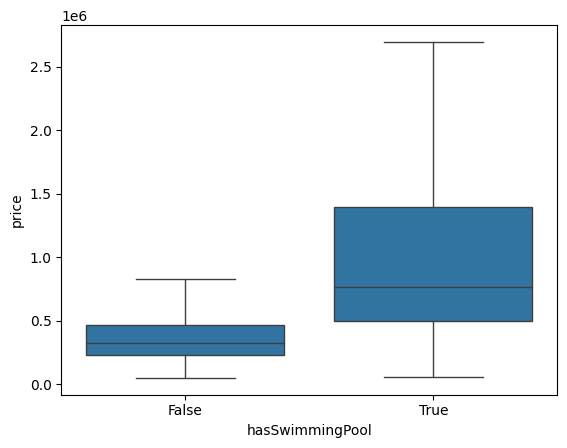

In [35]:
sns.boxplot(data = df_wo_null_price, x = 'hasSwimmingPool', y = 'price', showfliers=False )

<Axes: xlabel='hasHeatPump', ylabel='price'>

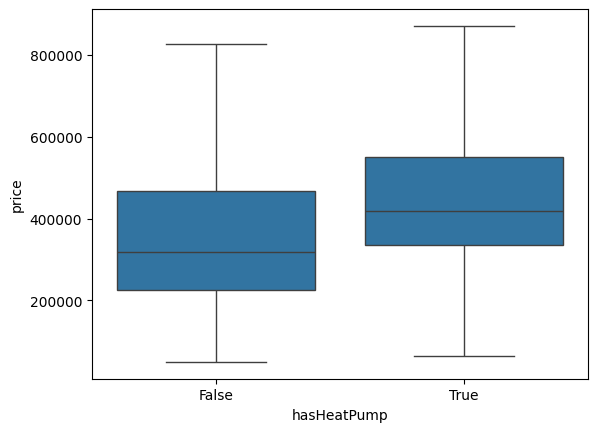

In [41]:
sns.boxplot(data = df_wo_null_price, x = 'hasHeatPump', y = 'price',  showfliers=False )

#### Photovoltaic

In [36]:
w_out_panels = df_wo_null_price.groupby('hasPhotovoltaicPanels')['price'].mean()
print(w_out_panels)

hasPhotovoltaicPanels
False    427461.335464
True     500008.890948
Name: price, dtype: float64


<Axes: xlabel='hasPhotovoltaicPanels', ylabel='price'>

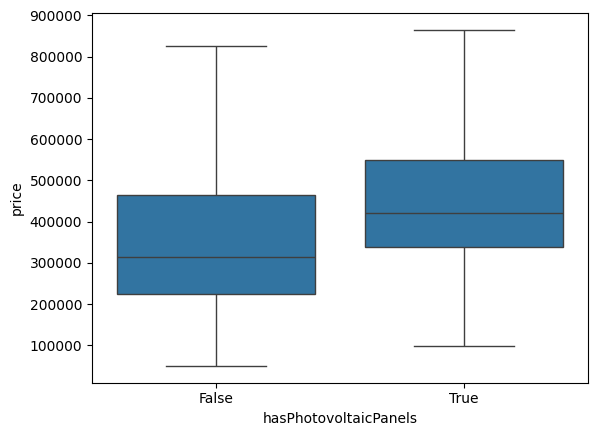

In [37]:
sns.boxplot(data = df_wo_null_price, x = 'hasPhotovoltaicPanels', y = 'price',  showfliers=False )

#### Dressing Room

<Axes: xlabel='hasDressingRoom', ylabel='price'>

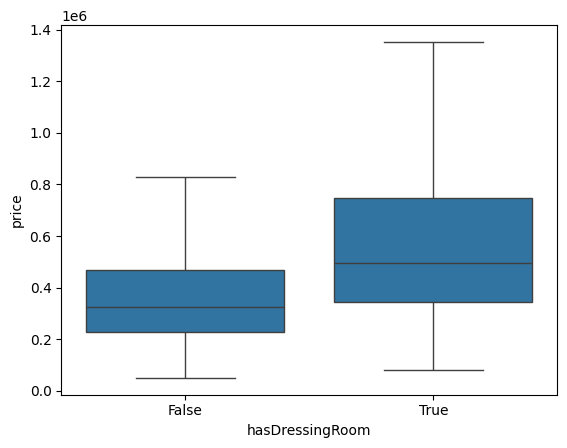

In [ ]:
sns.boxplot(data = df_wo_null_price, x = 'hasDressingRoom', y = 'price', showfliers=False )

#### Air conditioning

<Axes: xlabel='hasAirConditioning', ylabel='price'>

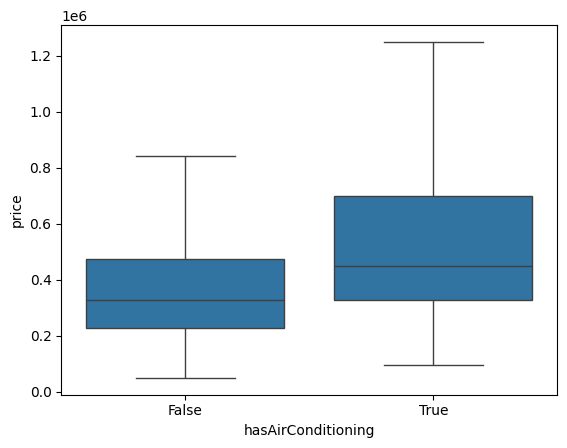

In [39]:
sns.boxplot(data = df_wo_null_price, x = 'hasAirConditioning', y = 'price', showfliers=False )

#### Fireplace

<Axes: xlabel='hasFireplace', ylabel='price'>

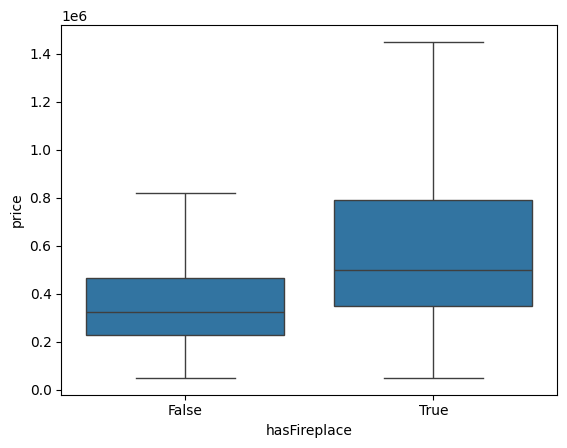

In [40]:
sns.boxplot(data = df_wo_null_price, x = 'hasFireplace', y = 'price',  showfliers=False )

In [ ]:
df_wo_null_price.columns

In [ ]:
df_wo_null_price.isna()

In [ ]:
for column in bool_columns:
    print( df_wo_null_price[column].value_counts())

In [ ]:
df_wo_null_price.isna().sum()

In [73]:
df_wo_null_price['gardenSurface'][~df_wo_null_price['hasGarden']] = 0 

C:\Users\herms\AppData\Local\Temp\ipykernel_31436\208848429.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_wo_null_price['gardenSurface'][~df_wo_null_price['hasGarden']] = 0
C:\Users\herms\AppData\Local\Temp\ipykernel_31436\208848429

In [ ]:
def filling_gardenSurface(df):
    if df['hasGarden'].all() == True:
        df['gardenSurface'] = 0

SyntaxError: cannot assign to function call here. Maybe you meant '==' instead of '='? (3056256671.py, line 3)

In [67]:
filling_gardenSurface(df_wo_null_price)

In [68]:
df_wo_null_price['gardenSurface'].isnull().sum()

np.int64(60203)

## Old

#### Bedroom

In [ ]:
raw_df['bedroom'].describe()


In [ ]:
# Null values
number_of_nan_bedrooms = len(raw_df[raw_df['bedroom'].isna()])
number_of_nan_bedrooms

#### Bathroom

In [ ]:
raw_df['bathroom'].describe()

In [ ]:
number_of_nan_bathrooms = len(raw_df[raw_df['bathroom'].isna()])
number_of_nan_bathrooms

#### Garage

In [ ]:
raw_df['garage'].describe()

In [ ]:
number_of_nan_garage = len(raw_df[raw_df['garage'].isna()])
number_of_nan_garage 

##### Replace NaN elements with 0's

In [ ]:
raw_df['garage'].fillna(0,inplace=True)

In [ ]:
number_of_nan_garage = len(raw_df[raw_df['garage'].isna()])
number_of_nan_garage 

In [ ]:
join_column_names(raw_df)

#### Garden

In [ ]:
raw_df['garden'].describe()

In [ ]:
number_of_nan_garden = len(raw_df[raw_df['garden'].isna()])
number_of_nan_garden

#### EPC

In [ ]:
raw_df['EPC(kWh/m²)'].describe()

In [ ]:
number_of_nan_EPC = len(raw_df[raw_df['EPC(kWh/m²)'].isna()])
number_of_nan_EPC

#### Renovation Obligation

In [ ]:
raw_df['renovation obligation'].describe()


In [ ]:
number_of_nan_ren = len(raw_df[raw_df['renovation obligation'].isna()])
number_of_nan_ren

#### Year Built

In [ ]:
raw_df['year_built'].describe()


In [ ]:
number_of_nan_year= len(raw_df[raw_df['year_built'].isna()])
number_of_nan_year

#### Mobiscore

In [ ]:
raw_df['mobiscore'].describe()


In [ ]:
number_of_nan_mobi = len(raw_df[raw_df['mobiscore'].isna()])
number_of_nan_mobi

In [ ]:
sns.lmplot(x='mobiscore', y='price', data=raw_df.head(500)) 

In [ ]:
correlation = raw_df['price'].corr(raw_df['mobiscore'])
print("Correlation:", correlation)

### Work on the dataset

#### Change category type

In [ ]:
raw_df['postcode'] = raw_df['postcode'].astype('category')

In [ ]:
sns.swarmplot(x='postcode', y='mobiscore', data=raw_df.head(50)) 



#### Checking attributes types

In [ ]:
raw_df.dtypes

#### Check to see if several attributes have NaN values

In [ ]:
## Drop these records
raw_df[raw_df[['bedroom']].isna().all(axis=1)]

In [ ]:

raw_df[raw_df[['bedroom', 'bathroom']].isna().all(axis=1)]

In [ ]:
raw_df[raw_df[['EPC(kWh/m²)', 'renovation_obligation', 'year_built']].isna().all(axis=1)]

In [ ]:
correlation = raw_df['bedroom'].corr(raw_df['living_area(m²)'])
print("Correlation:", correlation)

#### Dropping the url columns

In [ ]:
clean_df = raw_df.drop(columns={'url'})

In [ ]:
raw_df['price'].mean()

### Comparing attributes with price

In [ ]:
df_n_bedrooms = raw_df[~raw_df[['bedroom']].isna().all(axis=1)]

In [ ]:
avg_price_before = df_n_bedrooms['price'].mean()
avg_price_before

#### Excluding EPC

In [ ]:
corr_EPC = df_n_bedrooms['price'].corr(df_n_bedrooms['EPC(kWh/m²)'])
print(f"Correlation between EPC and price {corr_EPC}")

In [ ]:
df_n_bedrooms[df_n_bedrooms['EPC(kWh/m²)'].notna()]['price'].mean()

In [ ]:
df_n_EPC = df_n_bedrooms[~df_n_bedrooms[['EPC(kWh/m²)']].isna().all(axis=1)]
print(f"Average without EPC attribute {df_n_EPC['price'].mean()}")

#### Excluding year_built

In [ ]:
df_n_year = df_n_bedrooms[~df_n_bedrooms[['year_built']].isna().all(axis=1)]
print(f"Average without year_built attribute {df_n_year['price'].mean()}")

#### Excluding renovation_obligation

In [ ]:
df_n_ren = df_n_bedrooms[~df_n_bedrooms[['renovation_obligation']].isna().all(axis=1)]
print(f" Average without renovation_obligation attribute {df_n_ren['price'].mean()}")


In [ ]:
df_n_mobi = df_n_bedrooms[~df_n_bedrooms[['mobiscore']].isna().all(axis=1)]
print(f" Average without mobiscore attribute {df_n_mobi['price'].mean()}")


In [ ]:
sns.scatterplot(x='living_area(m²)', y='price', data = df_n_bedrooms.head(1000))

#### Change columns names

In [ ]:
raw_df.columns

In [ ]:
def join_column_names(df:pd) -> None:
    columns_new_names = dict()
    for column in df.columns:
        s = "_".join(column.split())
        if s != column:
            columns_new_names[column] = s

    df.rename(columns=columns_new_names, inplace=True)

In [ ]:
join_column_names(raw_df)